# CDC Behavioral Risk Factor Surveillance System

## Predictors of Mental Health

### Data Wrangling

The 2017 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2017 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 450,016 records for 2017.

The website is: https://www.cdc.gov/brfss/annual_data/annual_2017.html

Codebook for all variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

Codebook for calculated variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

### Install necessary libraries

In [1]:
import pandas as pd
import numpy as np
!pip install saspy
import saspy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dowload SAS file from above link and read in to pandas

In [2]:
data = pd.read_sas(r'C:\Users\Nick\Desktop\GitProjects\LLCP2017XPT\LLCP2017.xpt', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000001',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01122017',b'01',b'12',b'2017',1100.0,b'2017000002',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,b'01102017',b'01',b'10',b'2017',1100.0,b'2017000003',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,b'02082017',b'02',b'08',b'2017',1200.0,b'2017000004',2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
4,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000005',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0


In [3]:
data.shape

(450016, 358)

### This is a large dataframe. I looked through the codebook (link above) and made a list of all variables that have been shown to have some type of relationship with mental health...or I just found interesting. The list with recoding information is below:

#### Per codebook, all values indicting either missing, refused to answer, or unknown were recoded to reflect missing data (NaN). Otherwise, recoding info is below.

___STATE__ 

(US state: 1-72; MA=#25)

__SEX__

(1=male, 2=female)

Recoded: (0=female, 1=male)

___AGE_G__

(1=18-24, 2=25-34, 3=35-44, 4=45-54, 5=55-64, 6=65+)

___BMI5CAT__

(1= underweight, 2=normal weight, 3=overweight, 4=obese)

Recoded: (0=normal weight, 1=under/over-weight/obese)

_Body Mass Index_


___EDUCAG__ 

(1=<HS, 2=HS, 3=Attended College/Tech school, 4=Graduated College/Tech)

Recoded: (0=<college grad, 1=college grad)

_Education level_

___INCOMG__ 

(1=<15k, 2=15-25k, 3=25-35k, 4=35-50k, 5=50k+)

_Income level_

___DRNKWEK__ 

(0=no drinks, 1-999+=number of drinks per week)

_# alcoholic drinks per week?_

___RFDRHV5__ 

(1=no, 2=yes)

Recoded:(0=no, 1=yes)

_Heavy alcohol consumption?_

___PACAT1__

(1=highly active, 2=active, 3=insufficiently active, 4=inactive)

_Physical activity level_

__PA1MIN___

(0-99999)

"Minutes of total physical activity per week?"

__EXERANY2__

(1=Yes, 2=No, 7=dont' know, 9=refused)

Recoded: (0=no, 1=yes)

_"During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?_

___RFHLTH__

(1=good or better, 2=fair or poor)

Recoded: (0=poor health, 1=good health)

_General health status?_


__ADSLEEP__

(0-14)

_"Over the last 2 weeks, how many days have you had trouble falling asleep or staying asleep or sleeping too much?"_

___HCVU651__

(1=have, 2=don't have)

Recoded: (0=don't have, 1=have)

_"Do you have access to healthcare?"_

__EMPLOY1__

(1=Employed, 2=Self-Employed, 3=Unemployed 1+yrs, 4=Unemployed <1yr, 5=Homemaker, 6=Student, 7=Retired, 8=Unable to work)

Recoded: (0=unemployed/homemaker/retired, 1=employed/student)

_Employment_

__VETERAN3__

(1=Yes, 2=No)

Recoded: (0=no, 1=yes)

_"Have you ever served on active duty in the United States Armed Forces, either in the regular military or in a National Guard or military reserve unit?"_

__MARITAL__

(1=Married, 2=Divorced, 3=Widowed, 4=Separated, 5=Never Married, 6=Coupled, not married, 9=Refused)

Recoded: (0=unmarried, 1=married))

_"What is your marital status?"_

__MARIJANA__

(0-30)

_"During the past  30  days, on how many days did you use marijuana or hashish?_

__ADDEPEV2__

(1=yes, 2=no)

Recoded: (0=no, 1=yes)

_"(Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?"_

__CIMEMLOS__

(1=Yes, 2=No)

Recoded: (0=no, 1=yes)

_"During the past 12 months, have you experienced confusion or memory loss that is happening more often or is getting worse?"_

__LSATISFY__

(1=Very Satisfied, 2=Satisfied, 3=Disatisfied, 4=Very Disatisfied)

Recoded: (0=disatisfied, 1=satisfied)

_"In general, how satisfied are you with your life?

__FIREARM4__

(1=Yes, 2=No)

Recoded(0=no, 1=yes)

_"Are any firearms kept in or around your home?"_

__POORHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?"

__PHYSHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"_

__MENTHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"_

__MENTHLTH2__

(0=zero poor mental health days, 1=>0 poor mental health days

_This was a newly created binary variable from the above MENTHLTH continuous variable. All values indicting any number of reported days with poor mental health coded as '1', otherwise, no poor mental health days coded as '0'._

### Create subset including only the variables listed above:

In [4]:
pd.set_option('display.max_columns', 30)

LLCP=data[['_STATE', 'SEX', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG', '_RFDRHV5', '_PACAT1', 'PA1MIN_', 
           'EXERANY2', '_RFHLTH', 'ADSLEEP', '_HCVU651', 'EMPLOY1', 'VETERAN3', 'MARITAL', 'MARIJANA', 
           'ADDEPEV2', 'CIMEMLOS', 'LSATISFY', 'FIREARM4','POORHLTH', 'PHYSHLTH', 'MENTHLTH']]

LLCP.shape

(450016, 24)

### Now, let's recode the variables as described above

In [5]:
LLCP['SEX'].replace(2, 0, inplace=True)
LLCP['SEX'].replace(9, np.nan, inplace=True)

C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [6]:
LLCP['_BMI5CAT'].replace('.', np.nan, inplace=True)
LLCP['_BMI5CAT'].replace(3, 1, inplace=True)
LLCP['_BMI5CAT'].replace(4, 1, inplace=True)
LLCP['_BMI5CAT'].replace(2, 0, inplace=True)

In [7]:
LLCP['_EDUCAG'].replace(9, np.nan, inplace=True)
LLCP['_EDUCAG'].replace(1, 0, inplace=True)
LLCP['_EDUCAG'].replace(2, 0, inplace=True)
LLCP['_EDUCAG'].replace(3, 0, inplace=True)
LLCP['_EDUCAG'].replace(4, 1, inplace=True)

In [8]:
LLCP['_INCOMG'].replace(9, np.nan, inplace=True)

In [9]:
LLCP['_RFDRHV5'].replace(9, np.nan, inplace=True)
LLCP['_RFDRHV5'].replace(1, 0, inplace=True)
LLCP['_RFDRHV5'].replace(2, 1, inplace=True)

In [10]:
LLCP['_PACAT1'].replace(9, np.nan, inplace=True)

In [11]:
LLCP['EXERANY2'].replace(7, np.nan, inplace=True)
LLCP['EXERANY2'].replace(9, np.nan, inplace=True)
LLCP['EXERANY2'].replace(2, 0, inplace=True)

In [12]:
LLCP['_RFHLTH'].replace(9, np.nan, inplace=True)
LLCP['_RFHLTH'].replace(2, 0, inplace=True)

In [13]:
LLCP['ADSLEEP'].replace(88, 0, inplace=True)
LLCP['ADSLEEP'].replace(77, np.nan, inplace=True)
LLCP['ADSLEEP'].replace(99, np.nan, inplace=True)

In [14]:
LLCP['_HCVU651'].replace(9, np.nan, inplace=True)
LLCP['_HCVU651'].replace(2, 0, inplace=True)

In [15]:
LLCP['EMPLOY1'].replace(9, np.nan, inplace=True)
LLCP['EMPLOY1'].replace(2, 1, inplace=True)
LLCP['EMPLOY1'].replace(6, 1, inplace=True)
LLCP['EMPLOY1'].replace(3, 0, inplace=True)
LLCP['EMPLOY1'].replace(4, 0, inplace=True)
LLCP['EMPLOY1'].replace(5, 0, inplace=True)
LLCP['EMPLOY1'].replace(7, 0, inplace=True)
LLCP['EMPLOY1'].replace(8, 0, inplace=True)

In [16]:
LLCP['VETERAN3'].replace(7, np.nan, inplace=True)
LLCP['VETERAN3'].replace(9, np.nan, inplace=True)
LLCP['VETERAN3'].replace(2, 0, inplace=True)

In [17]:
LLCP['MARITAL'].replace(9, np.nan, inplace=True)
LLCP['MARITAL'].replace(2, 0, inplace=True)
LLCP['MARITAL'].replace(3, 0, inplace=True)
LLCP['MARITAL'].replace(4, 0, inplace=True)
LLCP['MARITAL'].replace(5, 0, inplace=True)
LLCP['MARITAL'].replace(6, 0, inplace=True)

In [18]:
LLCP['MARIJANA'].replace(88, 0, inplace=True)
LLCP['MARIJANA'].replace(77, np.nan, inplace=True)
LLCP['MARIJANA'].replace(99, np.nan, inplace=True)

In [19]:
LLCP['ADDEPEV2'].replace(2, 0, inplace=True)
LLCP['ADDEPEV2'].replace(7, np.nan, inplace=True)
LLCP['ADDEPEV2'].replace(9, np.nan, inplace=True)

In [20]:
LLCP['CIMEMLOS'].replace(7, np.nan, inplace=True)
LLCP['CIMEMLOS'].replace(9, np.nan, inplace=True)
LLCP['CIMEMLOS'].replace(2, 0, inplace=True)

In [21]:
LLCP['LSATISFY'].replace(7, np.nan, inplace=True)
LLCP['LSATISFY'].replace(9, np.nan, inplace=True)
LLCP['LSATISFY'].replace(2, 1, inplace=True)
LLCP['LSATISFY'].replace(3, 0, inplace=True)
LLCP['LSATISFY'].replace(4, 0, inplace=True)

In [22]:
LLCP['FIREARM4'].replace(7, np.nan, inplace=True)
LLCP['FIREARM4'].replace(9, np.nan, inplace=True)
LLCP['FIREARM4'].replace(2, 0, inplace=True)

In [23]:
LLCP['POORHLTH'].replace(88, 0, inplace=True)
LLCP['POORHLTH'].replace(77, np.nan, inplace=True)
LLCP['POORHLTH'].replace(99, np.nan, inplace=True)

In [24]:
LLCP['PHYSHLTH'].replace(88, 0, inplace=True)
LLCP['PHYSHLTH'].replace(77, np.nan, inplace=True)
LLCP['PHYSHLTH'].replace(99, np.nan, inplace=True)

In [25]:
LLCP['MENTHLTH'].replace(88, 0, inplace=True)
LLCP['MENTHLTH'].replace(77, np.nan, inplace=True)
LLCP['MENTHLTH'].replace(99, np.nan, inplace=True)

In [26]:
LLCP['MENTHLTH2']=LLCP['MENTHLTH']

LLCP.loc[LLCP['MENTHLTH2'] < 1, 'MENTHLTH2'] = 0
LLCP.loc[LLCP['MENTHLTH2'] > 0, 'MENTHLTH2'] = 1

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

#### Let's make sure all value types are appropriate. *They are*

In [27]:
LLCP.dtypes

_STATE       float64
SEX          float64
_AGE_G       float64
_BMI5CAT     float64
_EDUCAG      float64
_INCOMG      float64
_RFDRHV5     float64
_PACAT1      float64
PA1MIN_      float64
EXERANY2     float64
_RFHLTH      float64
ADSLEEP      float64
_HCVU651     float64
EMPLOY1      float64
VETERAN3     float64
MARITAL      float64
MARIJANA     float64
ADDEPEV2     float64
CIMEMLOS     float64
LSATISFY     float64
FIREARM4     float64
POORHLTH     float64
PHYSHLTH     float64
MENTHLTH     float64
MENTHLTH2    float64
dtype: object

#### There are many NaN values seen in the above summary output, so let's get a number of NaN for each column. We can see that there are a very high number of missing values for a few columns, such as LSATISFY.

In [28]:
LLCP.isnull().sum()

_STATE            0
SEX             284
_AGE_G            0
_BMI5CAT      36446
_EDUCAG        1707
_INCOMG       75085
_RFDRHV5      30180
_PACAT1       52681
PA1MIN_      156652
EXERANY2      34203
_RFHLTH        1149
ADSLEEP      400985
_HCVU651     163884
EMPLOY1        3706
VETERAN3        740
MARITAL        3146
MARIJANA     387047
ADDEPEV2       2124
CIMEMLOS     432581
LSATISFY     430575
FIREARM4     433325
POORHLTH     217498
PHYSHLTH       9331
MENTHLTH       7203
MENTHLTH2      7203
dtype: int64

#### Let's look at the summary stats

In [29]:
LLCP.describe()

,_STATE,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,ADSLEEP,_HCVU651,EMPLOY1,VETERAN3,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,450016.000000,449732.000000,450016.000000,413570.000000,448309.000000,374931.000000,419836.000000,397335.000000,2.933640e+05,415813.000000,448867.000000,49031.000000,286132.000000,446310.000000,449276.000000,446870.000000,62969.000000,447892.000000,17435.000000,19441.000000,16691.000000,232518.000000,440685.000000,442813.000000,442813.000000
mean,28.816780,0.441874,4.416081,0.688430,0.375611,3.748460,0.058258,2.457981,4.898493e+02,0.723955,0.807226,3.128653,0.885186,0.528480,0.128803,0.521161,0.858200,0.199175,0.103355,0.954581,0.454616,5.351973,4.412914,3.595398,0.322211
std,15.813072,0.496610,1.583006,0.463136,0.484281,1.447313,0.234232,1.233341,8.504535e+02,0.447040,0.394478,4.723776,0.318798,0.499189,0.334982,0.499553,4.529868,0.399381,0.304431,0.208228,0.497951,9.382512,8.895486,7.910237,0.467324
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.397605e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.200000e+02,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,2.700000e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.000000,6.000000,1.000000,1.000000,5.000000,0.000000,4.000000,5.500000e+02,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,1.000000
max,72.000000,1.000000,6.000000,1.000000,1.000000,5.000000,1.000000,4.000000,8.999000e+04,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


#### Let's look at our two target/dependent variables, to see if they look correct. It looks like the created binary variable is accurate. We can also see that most people report experiencing no poor mental health days. That's good, though the data will likely be imbalanced., but we can address that later.

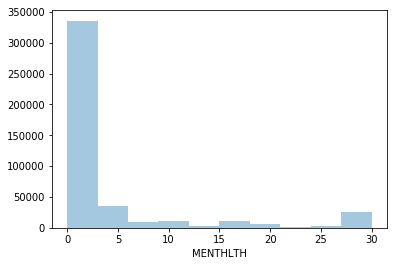

In [43]:
sns.distplot(LLCP['MENTHLTH'], kde=False, bins=10);

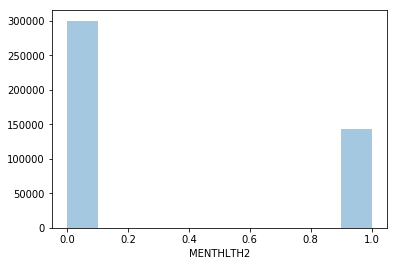

In [44]:
sns.distplot(LLCP['MENTHLTH2'], kde=False, bins=10);

### Let's visualize the missing data, because we will need to address this

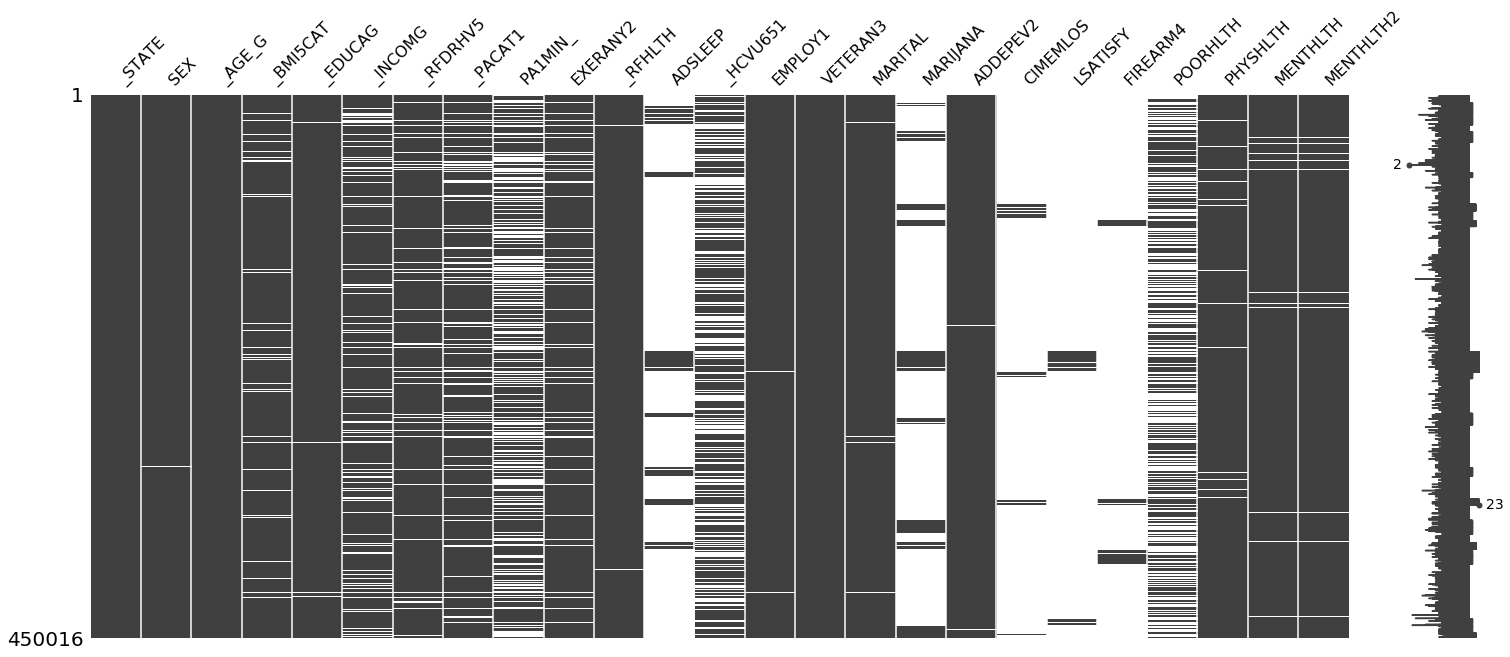

In [30]:
!pip install missingno
import missingno as msno

msno.matrix(LLCP)

#### The above visualization shows all missing data as white area. You can see there are a few variables that are almost all missing data.

#### We could drop all rows with missing data, but this would lead to far more data loss than would be acceptable. For the columns with some missing data, we can impute values based on the mean or median for the column. We can't do this for the columns with almost all missing, because almost all values would be imputed. So, we'll drop those from the analysis entirely. This is a shame, because variables such as Life Satisfaction and Sleep Quality are typically highly related to mental health. Oh well...

### Let's make a new dataframe with only the columns we can work with. I'm getting rid of State as well, though I may look at Massachusetts in isolation later.

In [31]:
LLCP2 = LLCP[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']]
LLCP2.shape

(450016, 19)

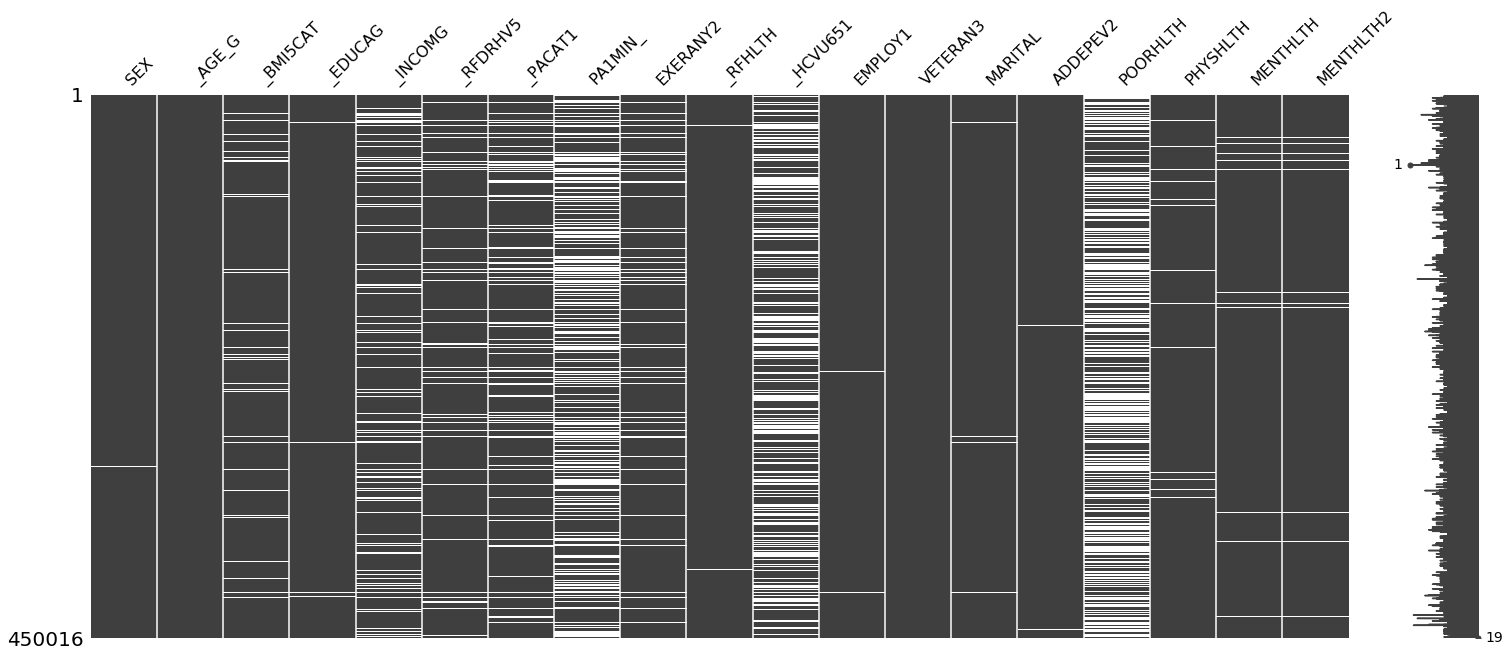

In [32]:
msno.matrix(LLCP2)

### Check the total number of values in each column, the mean, and SD, before and after imputing. We want to make sure the mean/SD don't change too much...they shouldn't.

In [33]:
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,449732.000000,450016.000000,413570.000000,448309.000000,374931.000000,419836.000000,397335.000000,2.933640e+05,415813.000000,448867.000000,286132.000000,446310.000000,449276.000000,446870.000000,447892.000000,232518.000000,440685.000000,442813.000000,442813.000000
mean,0.441874,4.416081,0.688430,0.375611,3.748460,0.058258,2.457981,4.898493e+02,0.723955,0.807226,0.885186,0.528480,0.128803,0.521161,0.199175,5.351973,4.412914,3.595398,0.322211
std,0.496610,1.583006,0.463136,0.484281,1.447313,0.234232,1.233341,8.504535e+02,0.447040,0.394478,0.318798,0.499189,0.334982,0.499553,0.399381,9.382512,8.895486,7.910237,0.467324
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.397605e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.200000e+02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,2.700000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,0.000000,4.000000,5.500000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,3.000000,2.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,1.000000,4.000000,8.999000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


### Let's now impute for missing values

In [34]:
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')#, axis=0)
LLCP2[['SEX','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']]=imputer.fit_transform(LLCP2[['SEX','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']])

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [35]:
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,4.500160e+05,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000
mean,0.441595,4.416081,0.713664,0.374187,3.790430,0.054351,2.404368,4.133191e+02,0.744936,0.807718,0.926998,0.532363,0.128591,0.524508,0.198235,2.765302,4.321413,3.537850,0.317053
std,0.496578,1.583006,0.452049,0.483913,1.324389,0.226710,1.168220,6.945976e+02,0.435898,0.394094,0.260140,0.498952,0.334747,0.499400,0.398671,7.255185,8.825211,7.859638,0.465329
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.397605e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.960000e+02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,2.700000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,0.000000,4.000000,3.640000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,1.000000,4.000000,8.999000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


#### We see above that most variables remained close to the original mean/SD. The POORHLTH changed a bit more, but let's roll with it for now (mean from 5.3 to 2.7).

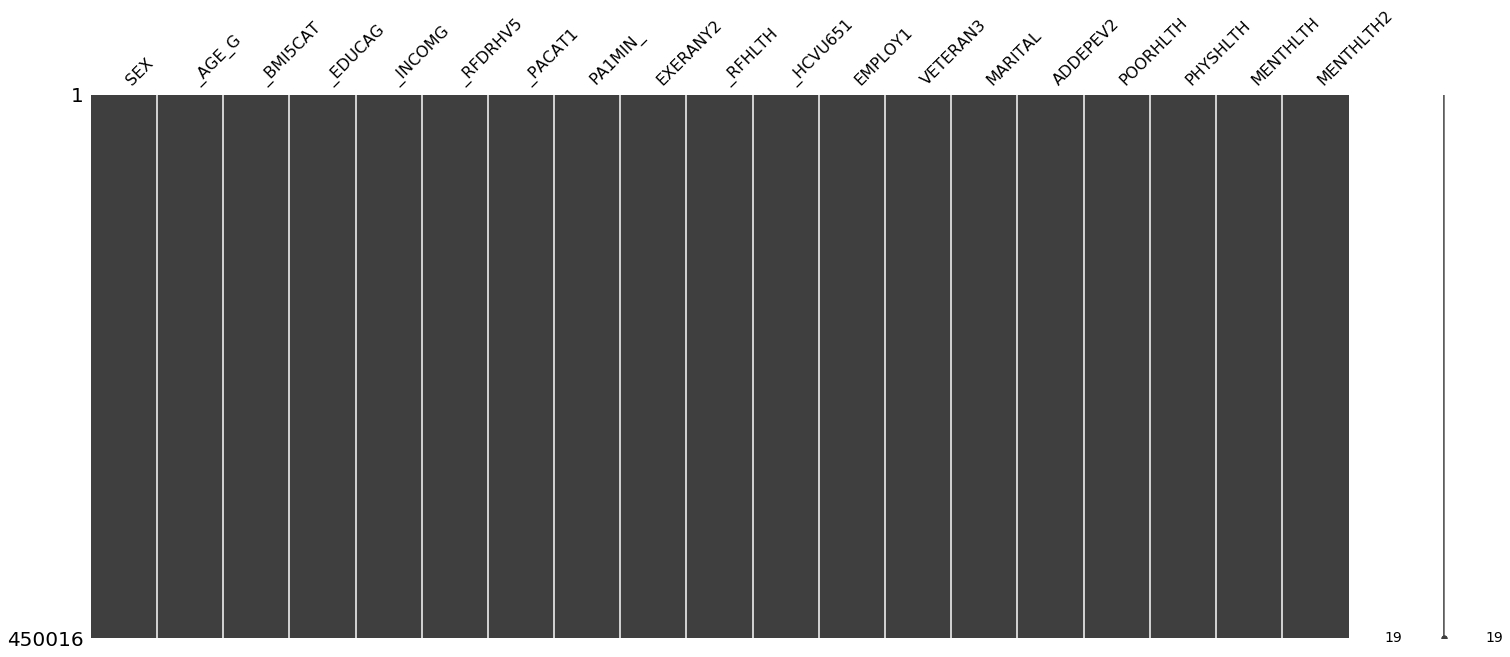

In [36]:
msno.matrix(LLCP2)

#### Ok, missing data is taken care of

### Let's save the dataframe as a .csv and move on to exploratory analysis and feature selection....

In [37]:
LLCP2.to_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv',header=True, index=None)